In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
import matplotlib.pylab as plt
import numpy as np
import graphviz
%matplotlib inline

In [3]:
cancer = load_breast_cancer()
print(cancer.DESCR) # DESCR: Veri kümesinin özelliklerini, hedef değişkenlerini ve diğer bilgileri içeren bir açıklama metni dizesi 

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [6]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [8]:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [10]:
type(cancer.data)
cancer.data.shape

(569, 30)

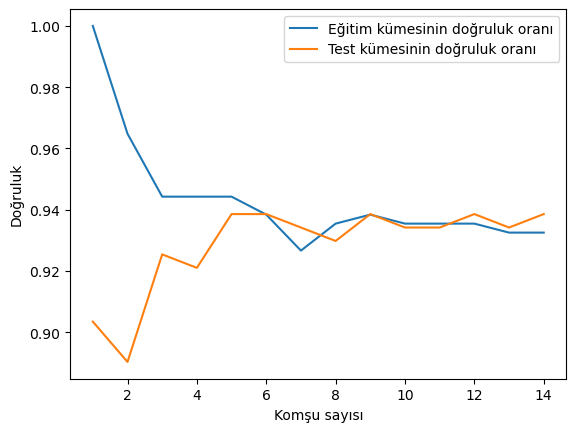

In [18]:
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size = 0.4, random_state = 20)

training_accuracy = []
test_accuracy = []

neighbors_setting = range(1,15)

for n_neighbors in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors = n_neighbors)
    knn.fit(x_train, y_train)
    training_accuracy.append(knn.score(x_train, y_train))
    test_accuracy.append(knn.score(x_test,y_test))
plt.plot(neighbors_setting, training_accuracy, label = "Eğitim kümesinin doğruluk oranı")
plt.plot(neighbors_setting, test_accuracy, label = "Test kümesinin doğruluk oranı")
plt.ylabel("Doğruluk")
plt.xlabel("Komşu sayısı")
plt.legend()

In [19]:
print("Eğitim kümesinin doğruluk oranı 6 komşu için : {:3f}".format(training_accuracy[5]))
print("Test kümesinin doğruluk oranı 6 komşu için: {:3f}".format(test_accuracy[5]))

Eğitim kümesinin doğruluk oranı 6 komşu için : 0.938416
Test kümesinin doğruluk oranı 6 komşu için: 0.938596


In [23]:
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size = 0.4, random_state = 20)

log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

print('Accuracy on the training set: {:.3f}'.format(log_reg.score(x_train,y_train)))
print('Accuracy on the test set: {:.3f}'.format(log_reg.score(x_test,y_test)))

#KNN'den daha iyi sonuç verir

Accuracy on the training set: 0.947
Accuracy on the test set: 0.947


C:\Users\hilal\anaconda3\envs\Hilal\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


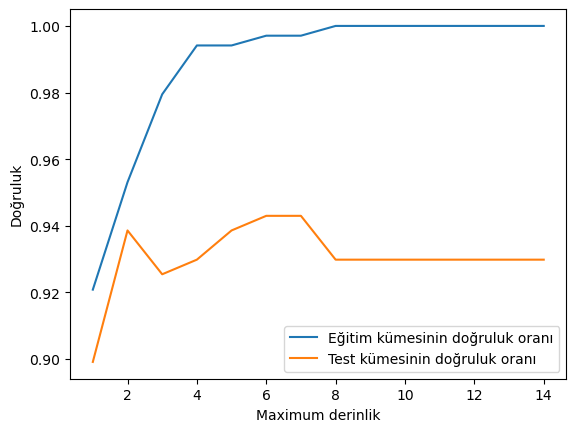

In [25]:
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size = 0.4, random_state = 20)

training_accuracy = []
test_accuracy = []

max_dep = range(1,15)

for md in max_dep:
    tree = DecisionTreeClassifier(max_depth=md,random_state=0)
    tree.fit(x_train,y_train)
    training_accuracy.append(tree.score(x_train, y_train))
    test_accuracy.append(tree.score(x_test, y_test))
    
plt.plot(max_dep, training_accuracy, label = "Eğitim kümesinin doğruluk oranı" )
plt.plot(max_dep, test_accuracy, label = "Test kümesinin doğruluk oranı")
plt.xlabel("Maximum derinlik")
plt.ylabel("Doğruluk")
plt.legend()

#Görüldüğü üzere maximum derinlik 3 olduğunda en iyi sonucu verir

In [26]:
export_graphviz(tree,out_file = "cancerTree.dot", class_names= ["malignant","bening"],feature_names = cancer.feature_names, impurity = False, filled = True)

# tree: Karar ağacı modeli
# out_file: Dışa aktarılan dot dosyasının adı ve yolu
# class_names: Sınıf adlarının listesi. Bu, ağaç çizildiğinde her bir sınıf düğümü için etiket sağlar
# feature_names: Özellik adlarının listesi. Bu, her bir düğümdeki özelliklerin adlarını belirtir.
# impurity: Entropi gibi saflık ölçüsünün çizimde gösterilip gösterilmeyeceğini belirleyen bir bool değer.
# filled: Düğümlerin renkli olup olmayacağını belirleyen bir bool değer.


In [27]:
tree.feature_importances_ # Özellik önem sırası

array([0.        , 0.01564533, 0.0082403 , 0.        , 0.        ,
       0.        , 0.        , 0.69375028, 0.        , 0.        ,
       0.02371773, 0.00927033, 0.        , 0.        , 0.01070169,
       0.        , 0.        , 0.0286056 , 0.        , 0.01225296,
       0.06155418, 0.01311558, 0.08007718, 0.        , 0.01557476,
       0.0082403 , 0.01925377, 0.        , 0.        , 0.        ])

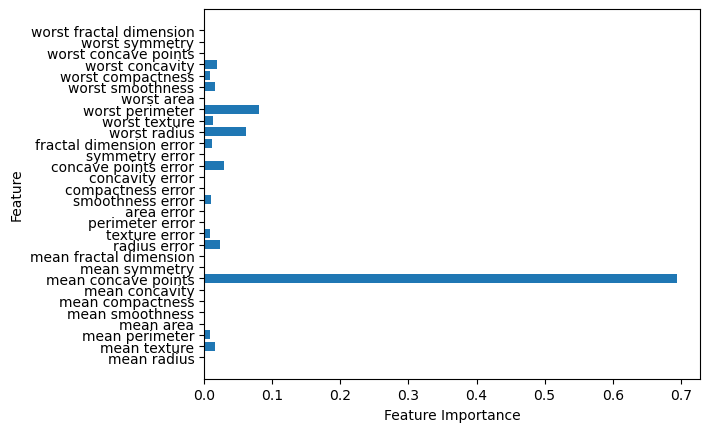

In [28]:
n_feature = cancer.data.shape[1]
plt.barh(range(n_feature), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_feature), cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

In [29]:
# Decision Tress perform well and we don't need to standardize features
# But as you see, it can easilly overfit 

In [30]:
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size = 0.4, random_state = 20)


forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(x_train,y_train)


print('acc for training data: {:.3f}'.format(forest.score(x_train,y_train)))
print('acc for test data: {:.3f}'.format(forest.score(x_test,y_test)))

acc for training data: 1.000
acc for test data: 0.956


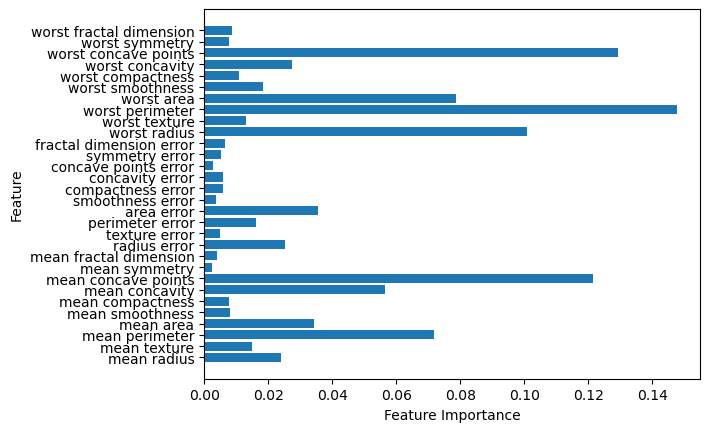

In [31]:
n_feature = cancer.data.shape[1]
plt.barh(range(n_feature), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_feature), cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

In [34]:
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size = 0.4, random_state = 20)

mlp = MLPClassifier(random_state=42)
mlp.fit(x_train, y_train)

print('acc for training data: {:.3f}'.format(mlp.score(x_train, y_train)))
print('acc for test data: {:.3f}'.format(mlp.score(x_test, y_test)))

acc for training data: 0.933
acc for test data: 0.939


C:\Users\hilal\anaconda3\envs\Hilal\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [36]:
scaler = StandardScaler()
X_train_scaled = scaler.fit(x_train).transform(x_train)
X_test_scaled = scaler.fit(x_test).transform(x_test)

mlp = MLPClassifier(max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)

print('acc for training data: {:.3f}'.format(mlp.score(X_train_scaled, y_train)))
print('acc for test data: {:.3f}'.format(mlp.score(X_test_scaled, y_test)))

acc for training data: 1.000
acc for test data: 0.969


In [37]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=42)
mlp.fit(X_train_scaled,y_train)
print('acc for training data: {:.3f}'.format(mlp.score(X_train_scaled, y_train)))
print('acc for test data: {:.3f}'.format(mlp.score(X_test_scaled, y_test)))

acc for training data: 0.988
acc for test data: 0.996


In [38]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svm= SVC()
svm.fit(X_train, y_train)

print('acc on train dataset: {:.3f}'.format(svm.score(X_train,y_train)))
print('acc on test dataset: {:.3f}'.format(svm.score(X_test,y_test)))

acc on train dataset: 0.904
acc on test dataset: 0.937


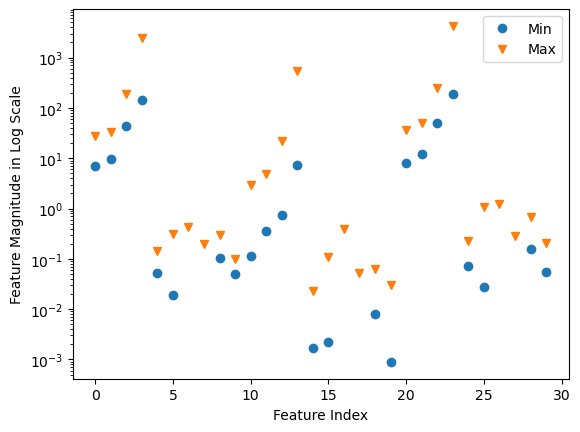

In [39]:
plt.plot(X_train.min(axis=0), 'o', label='Min')
plt.plot(X_train.max(axis=0), 'v', label='Max')
plt.xlabel('Feature Index')
plt.ylabel('Feature Magnitude in Log Scale')
plt.yscale('log')
plt.legend(loc='upper right')